<div style="background-color:#2E87A4 ;color:#FDFDFD;padding:20px;border:1px solid #3184BB;text-align:center;">
<p><font size="14" color="#FDFDFD" face="Lora"><i>Text Data - Sentiment Analysis</i></font> </p>
</div>

## Data Description
 This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.
## Data includes:
- Reviews from Oct 1999 - Oct 2012 - 568,454 reviews
- 256,059 Users and 74,258 products
- 260 users with > 50 reviews


# Problem Statement :
 #### The aim here will be to `predict the score for the given text review` by an individual for the product he brought on amazon.

## Create DataFrame from raw text files

In [ ]:
import pandas as pd
import numpy as np

import re
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content'

In [ ]:

from zipfile import ZipFile
file_name="/content/drive/MyDrive/txt_reviews.zip"
with ZipFile(file_name,'r')as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
root_dir = '/content/txt_reviews'

In [ ]:
file_names = os.listdir('/content/txt_reviews')

print('Total number of files in the dataset:', len(file_names))

Total number of files in the dataset: 568454


In [ ]:
Product_id=[]
User_id=[]
Profile_Name=[]
Helpfulness_Numerator=[]
Helpfulness_Denominator=[]
Score=[]
Time=[]
Review_Summary=[]
Review_Text=[]


for file in file_names:
  with open(os.path.join(root_dir,file),'rt') as f:
        lines = f.readlines()
        Product_id.append(lines[0].split(":")[1].strip('\n'))
        User_id.append(lines[1].split(":")[1].strip('\n'))
        Profile_Name.append(lines[2].split(":")[1].strip('\n'))
        Helpfulness_Numerator.append(lines[3].split(":")[1].strip('\n'))
        Helpfulness_Denominator.append(lines[4].split(":")[1].strip('\n'))
        Score.append(lines[5].split(":")[1].strip('\n'))
        Time.append(lines[6].split(":")[1].strip('\n'))
        Review_Summary.append(lines[7].split(":")[1].strip('\n'))
        Review_Text.append(lines[8].split(":")[1].strip('\n'))



nlp_df=pd.DataFrame({"Product_id":Product_id,"User_id":User_id,"Profile_Name":Profile_Name,"Helpfulness_Numerator":Helpfulness_Numerator,"Helpfulness_Denominator":Helpfulness_Denominator,
                   "Score":Score,"Time":Time,"Review_Summary":Review_Summary,"Review_Text":Review_Text})

### Load the data and perform the basic EDA to understand the data.

In [ ]:
nlp_df

,Product_id,User_id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B001F1YU9U,A36WSDKG3J0VJT,"Melly ""Cruise Freak""",1,1,5,1252281600,I'm so glad I don't need coffee anymore!!!,I first found this product at a local health ...
1,B000WFNB6S,A128Y4G48WPKGS,EllieRN,0,0,5,1307145600,Becoming difficult to find,My very finicky cat loves the Sardine and mac...
2,B004EYHAN8,A3Q32Q419BZ7AQ,C. Connolly,0,0,5,1304294400,Charlee Bear Treats,Great treat for motivating dogs! Every dog I...
3,B007221CAQ,A24FC67HKRG9LE,DDB,0,0,5,1350345600,British treat!,My mum used to mix this cordial when I was a ...
4,B008O3G2GG,A2CF66KIQ3RKX3,Vivian Deliz,1,2,1,1318032000,Too confusing for my dog,"I decided to try this ""treat"" with my new dog..."
...,...,...,...,...,...,...,...,...,...
568449,B001D0KG1O,A2XD4K4LPNG2GR,Pen Pal,0,0,4,1317859200,Nice flavor,I love the flavor of this coffee. The only dr...
568450,B000EDG4K8,A16JVUF35HQKHK,Edwin N. Daniels,0,0,5,1292976000,Great Product Will Buy Again.,"I have tried many soy protein drinks, this is..."
568451,B000P4Y8KO,A17876KM1LDWOO,Zelda,0,0,5,1349222400,The Best of Snack Bars,These taste great and have a lower sodium con...
568452,B000CQIDJM,A2GZ3O8AHD3PI2,L. G. M.,1,1,4,1226620800,chocolate hazelnut tea,The first time I tried it I was kind of dissa...


In [ ]:
# Converting DataFrame to CSV formate

In [ ]:
nlp_df.to_csv('/content/txt_reviews.csv')

In [ ]:
# Loading the converted DataFrame

In [ ]:
nlp_df1=pd.read_csv(r"/content/txt_reviews.csv")

## Performing a basic Exploratory Data Analysis to understand the data




In [ ]:
nlp_df1.head()

,Unnamed: 0,Product_id,User_id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,0,B001F1YU9U,A36WSDKG3J0VJT,"Melly ""Cruise Freak""",1,1,5,1252281600,I'm so glad I don't need coffee anymore!!!,I first found this product at a local health ...
1,1,B000WFNB6S,A128Y4G48WPKGS,EllieRN,0,0,5,1307145600,Becoming difficult to find,My very finicky cat loves the Sardine and mac...
2,2,B004EYHAN8,A3Q32Q419BZ7AQ,C. Connolly,0,0,5,1304294400,Charlee Bear Treats,Great treat for motivating dogs! Every dog I...
3,3,B007221CAQ,A24FC67HKRG9LE,DDB,0,0,5,1350345600,British treat!,My mum used to mix this cordial when I was a ...
4,4,B008O3G2GG,A2CF66KIQ3RKX3,Vivian Deliz,1,2,1,1318032000,Too confusing for my dog,"I decided to try this ""treat"" with my new dog..."


In [ ]:
nlp_df1.tail()

,Unnamed: 0,Product_id,User_id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
568449,568449,B001D0KG1O,A2XD4K4LPNG2GR,Pen Pal,0,0,4,1317859200,Nice flavor,I love the flavor of this coffee. The only dr...
568450,568450,B000EDG4K8,A16JVUF35HQKHK,Edwin N. Daniels,0,0,5,1292976000,Great Product Will Buy Again.,"I have tried many soy protein drinks, this is..."
568451,568451,B000P4Y8KO,A17876KM1LDWOO,Zelda,0,0,5,1349222400,The Best of Snack Bars,These taste great and have a lower sodium con...
568452,568452,B000CQIDJM,A2GZ3O8AHD3PI2,L. G. M.,1,1,4,1226620800,chocolate hazelnut tea,The first time I tried it I was kind of dissa...
568453,568453,B003ZI5U2W,A3IFT8N1349D6J,ItsRachel,2,2,5,1337644800,Very liquid but absolutely delicious,"I love this stuff, maybe even more than peanu..."


In [ ]:
# check for any corrupted data by `df.info()` check weahther all the features are having the correct data type

In [ ]:
nlp_df1.info() # the data types of all the features are correct but we are haing unwanted characters which will be removed during cleaning #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Unnamed: 0               568454 non-null  int64 
 1   Product_id               568454 non-null  object
 2   User_id                  568454 non-null  object
 3   Profile_Name             568454 non-null  object
 4   Helpfulness_Numerator    568454 non-null  int64 
 5   Helpfulness_Denominator  568454 non-null  int64 
 6   Score                    568454 non-null  int64 
 7   Time                     568454 non-null  int64 
 8   Review_Summary           568454 non-null  object
 9   Review_Text              568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
# Check for Duplicates in our dataset

In [ ]:
nlp_df1.duplicated().value_counts() # As we can see that there are no duplicated records in our dataset

False    568454
dtype: int64

In [ ]:
# Check for missing values

In [ ]:
nlp_df1.isna().sum() # As we can see that there are no missing the values in our dataset

Unnamed: 0                 0
Product_id                 0
User_id                    0
Profile_Name               0
Helpfulness_Numerator      0
Helpfulness_Denominator    0
Score                      0
Time                       0
Review_Summary             0
Review_Text                0
dtype: int64

## Check for Outliers

### Skewness:
**Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.**


* Less than -1 or greater than 1, then the distribution is highly skewed.
* Between -1 and -0.5 or 0.5 and 1, then the distribution is moderately skewed.
* Between -0.5 and 0.5, then the distribution is approx. symmetric.
* When skewness = 0, then the data is perfrctly symmetric.

In [ ]:
nlp_df1.columns # to view the columns

Index(['Unnamed: 0', 'Product_id', 'User_id', 'Profile_Name',
       'Helpfulness_Numerator', 'Helpfulness_Denominator', 'Score', 'Time',
       'Review_Summary', 'Review_Text'],
      dtype='object')

In [ ]:
nlp_df1.drop(['Unnamed: 0'] , axis = 1, inplace = True)
nlp_df1 # Unwanted column is droped

,Product_id,User_id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B001F1YU9U,A36WSDKG3J0VJT,"Melly ""Cruise Freak""",1,1,5,1252281600,I'm so glad I don't need coffee anymore!!!,I first found this product at a local health ...
1,B000WFNB6S,A128Y4G48WPKGS,EllieRN,0,0,5,1307145600,Becoming difficult to find,My very finicky cat loves the Sardine and mac...
2,B004EYHAN8,A3Q32Q419BZ7AQ,C. Connolly,0,0,5,1304294400,Charlee Bear Treats,Great treat for motivating dogs! Every dog I...
3,B007221CAQ,A24FC67HKRG9LE,DDB,0,0,5,1350345600,British treat!,My mum used to mix this cordial when I was a ...
4,B008O3G2GG,A2CF66KIQ3RKX3,Vivian Deliz,1,2,1,1318032000,Too confusing for my dog,"I decided to try this ""treat"" with my new dog..."
...,...,...,...,...,...,...,...,...,...
568449,B001D0KG1O,A2XD4K4LPNG2GR,Pen Pal,0,0,4,1317859200,Nice flavor,I love the flavor of this coffee. The only dr...
568450,B000EDG4K8,A16JVUF35HQKHK,Edwin N. Daniels,0,0,5,1292976000,Great Product Will Buy Again.,"I have tried many soy protein drinks, this is..."
568451,B000P4Y8KO,A17876KM1LDWOO,Zelda,0,0,5,1349222400,The Best of Snack Bars,These taste great and have a lower sodium con...
568452,B000CQIDJM,A2GZ3O8AHD3PI2,L. G. M.,1,1,4,1226620800,chocolate hazelnut tea,The first time I tried it I was kind of dissa...


In [ ]:
nlp_df1.skew() # check for the Skewness to see if there are any presence of outliers:

Helpfulness_Numerator      37.521614
Helpfulness_Denominator    32.632886
Score                      -1.460985
Time                       -1.228063
dtype: float64

#### Intuitions:

* As we can see that features `Helpfulness_Numerator, Helpfulness_Denominator`
  is having a skewness of far greater than one and
* Hence the distribution is highly `skewed` ( Mean is far away from Median) and `outliers` are present.
* the features `Score,Time` having skewness slightly less than -1. Hence they are also having the outliers.

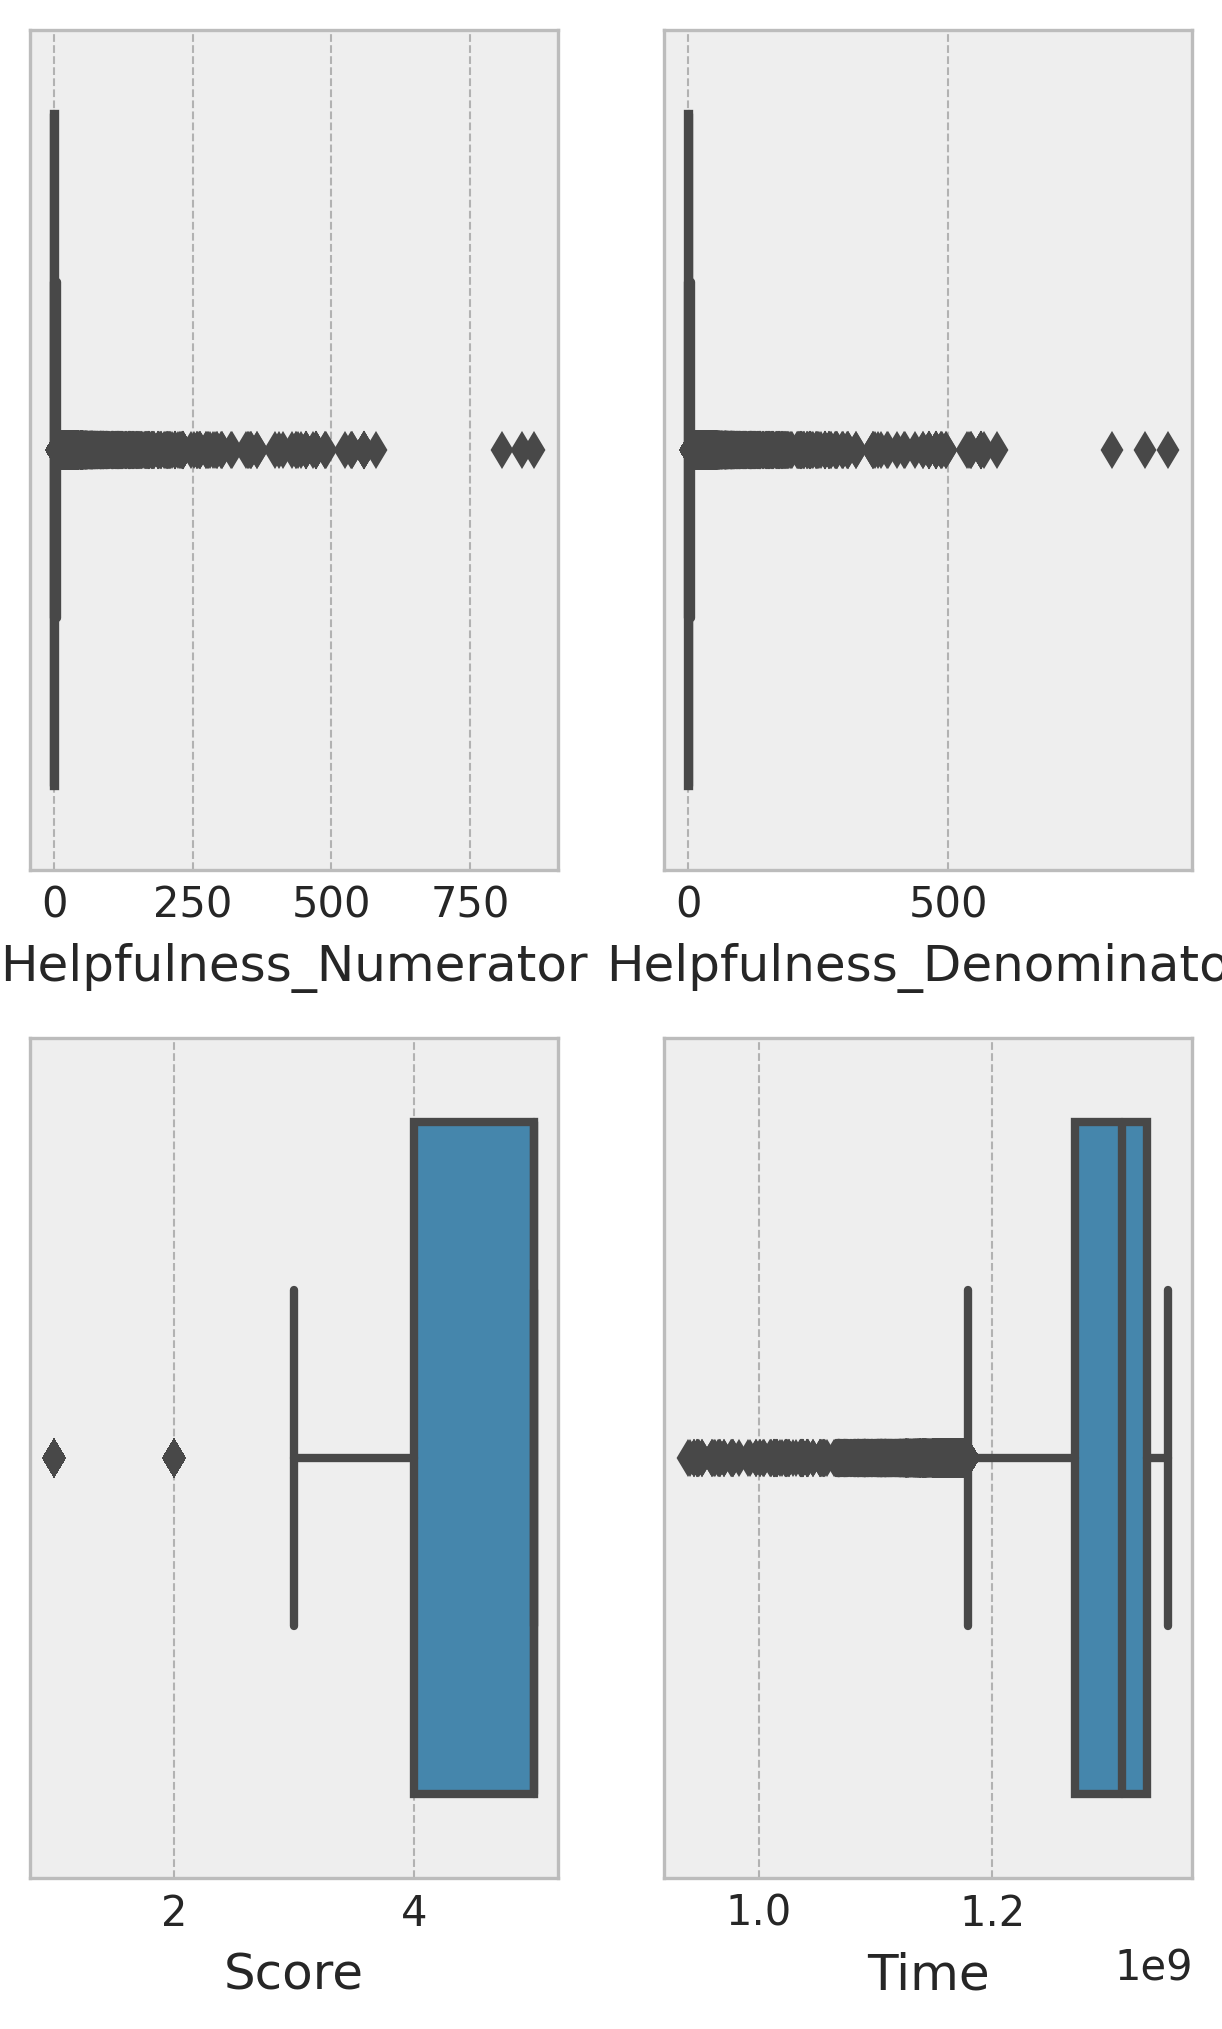

In [ ]:
# View the outliers through visualization
# Drawing the boxplot
plt.figure(figsize=(5,8), dpi = 150)
plt.subplot(221)
sns.boxplot(x= 'Helpfulness_Numerator', data=nlp_df1);
plt.subplot(222)
sns.boxplot(x= 'Helpfulness_Denominator', data=nlp_df1);
plt.subplot(223)
sns.boxplot(x= 'Score', data=nlp_df1);
plt.subplot(224)
sns.boxplot(x= 'Time', data=nlp_df1);

## Note
For the given `Text Data - Sentiment Analysis` we only require **Review_Text** and **Score** for the `Model Building` which will predict the score for the given text review

# Build a model

### Task A - Perform data preprocessing on the given text data and convert it into numerical vectors.

In [ ]:
nlp = nlp_df1[['Review_Text','Score']]

In [ ]:
nlp.head()

,Review_Text,Score
0,I first found this product at a local health ...,5
1,My very finicky cat loves the Sardine and mac...,5
2,Great treat for motivating dogs! Every dog I...,5
3,My mum used to mix this cordial when I was a ...,5
4,"I decided to try this ""treat"" with my new dog...",1


In [ ]:
y = nlp['Score']
X = nlp[['Review_Text']]

In [ ]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [ ]:
X_train.head()

,Review_Text
67866,my 2 bags of dark chocolate covered pomegrana...
122434,"My dog loved these, and he's picky as can be ..."
553789,The fruitcake arrived in great shape in a nic...
356935,My goodness! Try these for a week. Your col...
351597,"Sure, I could have gone on a food crusade at ..."


In [ ]:
X_train.shape

(397917, 1)

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [ ]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [ ]:
def pre_Processor(Raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", Raw_text)

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()

    # remove stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [ ]:
# # Convert to series
temp =X_train['Review_Text'].apply(lambda x: pre_Processor(x, 'stem'))


In [ ]:
temp.head()

,clean_Reviewtext_stem,Reviewtext_length_stem
67866,bag dark chocol cover pomegran came melt two b...,52
122434,dog love picki treat would break two three pie...,29
553789,fruitcak arriv great shape nice tin order base...,40
356935,good tri week colon never,5
351597,sure could gone food crusad local groceri find...,41


In [ ]:
temp.columns = ['clean_Reviewtext_stem', 'Reviewtext_length_stem']

temp.head()

,clean_Reviewtext_stem,Reviewtext_length_stem
67866,bag dark chocol cover pomegran came melt two b...,52
122434,dog love picki treat would break two three pie...,29
553789,fruitcak arriv great shape nice tin order base...,40
356935,good tri week colon never,5
351597,sure could gone food crusad local groceri find...,41


In [ ]:
X_test.head()

,Review_Text
438256,I feed this to my puppy along with the dry fo...
362810,When company comes over it is great for me to...
33030,Love the chocolate crunch rice cakes. Not the...
486713,"I had high hopes for this product, because it..."
39460,"Wow this stuff is delicious, very sweet-can't..."


In [ ]:
from tqdm import tqdm, tqdm_notebook

In [ ]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [ ]:
temp1 = X_test['Review_Text'].progress_apply(lambda x: pre_Processor(x, 'stem'))

temp1.head()

100%|██████████| 170537/170537 [31:55<00:00, 89.01it/s] 


,0,1
438256,feed puppi along dri formula get eat lick bowl...,21
362810,compani come great abl offer maxwel hous coffe...,45
33030,love chocol crunch rice cake best price glad a...,12
486713,high hope product healthi afford neither chihu...,22
39460,wow stuff delici sweet believ sugar free love ...,18


In [ ]:
temp1.columns = ['clean_Reviewtext_stem', 'Reviewtext_length_stem']

temp1.head()

,clean_Reviewtext_stem,Reviewtext_length_stem
438256,feed puppi along dri formula get eat lick bowl...,21
362810,compani come great abl offer maxwel hous coffe...,45
33030,love chocol crunch rice cake best price glad a...,12
486713,high hope product healthi afford neither chihu...,22
39460,wow stuff delici sweet believ sugar free love ...,18


In [ ]:
X_train = pd.concat([X_train, temp], axis=1)

X_train.head()


,Review_Text,clean_Reviewtext_stem,Reviewtext_length_stem
67866,my 2 bags of dark chocolate covered pomegrana...,bag dark chocol cover pomegran came melt two b...,52
122434,"My dog loved these, and he's picky as can be ...",dog love picki treat would break two three pie...,29
553789,The fruitcake arrived in great shape in a nic...,fruitcak arriv great shape nice tin order base...,40
356935,My goodness! Try these for a week. Your col...,good tri week colon never,5
351597,"Sure, I could have gone on a food crusade at ...",sure could gone food crusad local groceri find...,41


In [ ]:
X_test = pd.concat([X_test, temp1], axis=1)

X_test.head()

,Review_Text,clean_Reviewtext_stem,Reviewtext_length_stem
438256,I feed this to my puppy along with the dry fo...,feed puppi along dri formula get eat lick bowl...,21
362810,When company comes over it is great for me to...,compani come great abl offer maxwel hous coffe...,45
33030,Love the chocolate crunch rice cakes. Not the...,love chocol crunch rice cake best price glad a...,12
486713,"I had high hopes for this product, because it...",high hope product healthi afford neither chihu...,22
39460,"Wow this stuff is delicious, very sweet-can't...",wow stuff delici sweet believ sugar free love ...,18


## Converting Text to Numerical vectors - BOW Representation

In [ ]:
X_train.head()

,Review_Text,clean_Reviewtext_stem,Reviewtext_length_stem
67866,my 2 bags of dark chocolate covered pomegrana...,bag dark chocol cover pomegran came melt two b...,52
122434,"My dog loved these, and he's picky as can be ...",dog love picki treat would break two three pie...,29
553789,The fruitcake arrived in great shape in a nic...,fruitcak arriv great shape nice tin order base...,40
356935,My goodness! Try these for a week. Your col...,good tri week colon never,5
351597,"Sure, I could have gone on a food crusade at ...",sure could gone food crusad local groceri find...,41


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train['clean_Reviewtext_stem'])

In [ ]:
X_train_bow

<397917x60596 sparse matrix of type '<class 'numpy.int64'>'
	with 11703451 stored elements in Compressed Sparse Row format>

In [ ]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 60596
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (397917, 60596)


In [ ]:
X_test_bow = vocab.transform(X_test['clean_Reviewtext_stem'])

In [ ]:
X_test_bow

<170537x60596 sparse matrix of type '<class 'numpy.int64'>'
	with 4979763 stored elements in Compressed Sparse Row format>

In [ ]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_test_bow))

print("Shape of input data:", X_test_bow.shape)

Total unique words: 60596
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (170537, 60596)


# Task B - Build models to predict the Score of a given text review.

## Logistic Regression Model


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1.fit(X_train_bow, y_train)

LogisticRegression()

In [ ]:
y_test_pred = classifier1.predict(X_test_bow) # Prediction

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred)) # Evaluating the model using the Evaluation metrics

print(classification_report(y_test, y_test_pred))

0.727044570972868
              precision    recall  f1-score   support

           1       0.65      0.64      0.64     15773
           2       0.43      0.20      0.27      8738
           3       0.45      0.26      0.33     12985
           4       0.52      0.22      0.30     24282
           5       0.78      0.95      0.86    108759

    accuracy                           0.73    170537
   macro avg       0.57      0.45      0.48    170537
weighted avg       0.69      0.73      0.69    170537



In [ ]:
LR_ac = accuracy_score(y_test, y_test_pred)

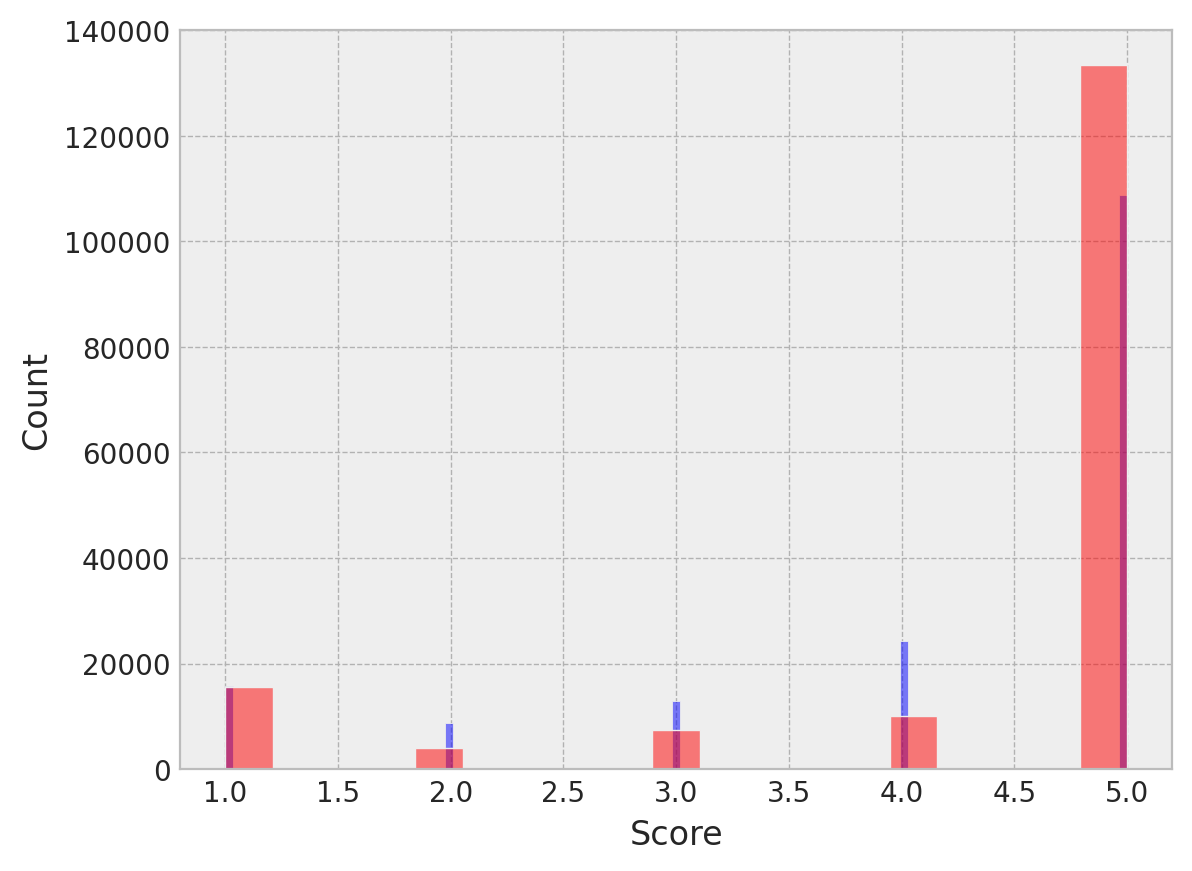

In [ ]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## Decision Tree Classifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train_bow, y_train)

DecisionTreeClassifier()

In [ ]:
y_test_pred1 = classifier2.predict(X_test_bow) # Prediction

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred1)) # Evaluating the model using the Evaluation metrics

print(classification_report(y_test, y_test_pred1))

0.7430586910758369
              precision    recall  f1-score   support

           1       0.63      0.61      0.62     15773
           2       0.49      0.44      0.46      8738
           3       0.52      0.47      0.49     12985
           4       0.55      0.50      0.52     24282
           5       0.84      0.87      0.85    108759

    accuracy                           0.74    170537
   macro avg       0.61      0.58      0.59    170537
weighted avg       0.73      0.74      0.74    170537



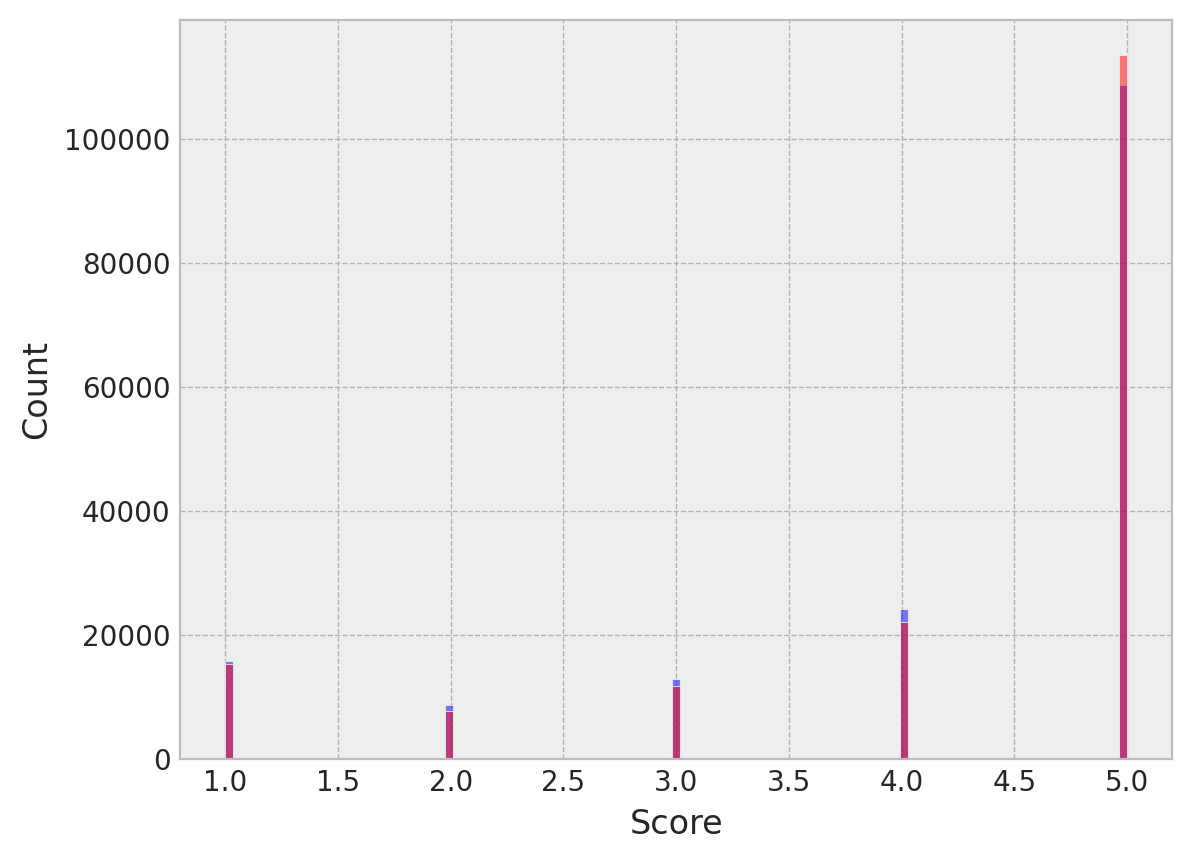

In [ ]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred1, color='red', alpha=0.5);

In [ ]:
DT_ac = accuracy_score(y_test, y_test_pred1)

## KNeighborsClassifier Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier()
classifier4.fit(X_train_bow, y_train) # Training the model and Building the model

KNeighborsClassifier()

In [ ]:
y_test_pred3 = classifier4.predict(X_test_bow) # Prediction

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred3)) # Evaluating the model using the Evaluation metrics

print(classification_report(y_test, y_test_pred3))

0.6621906096624193
              precision    recall  f1-score   support

           1       0.51      0.40      0.45     15773
           2       0.38      0.31      0.34      8738
           3       0.44      0.32      0.37     12985
           4       0.40      0.38      0.39     24282
           5       0.76      0.83      0.80    108759

    accuracy                           0.66    170537
   macro avg       0.50      0.45      0.47    170537
weighted avg       0.64      0.66      0.65    170537



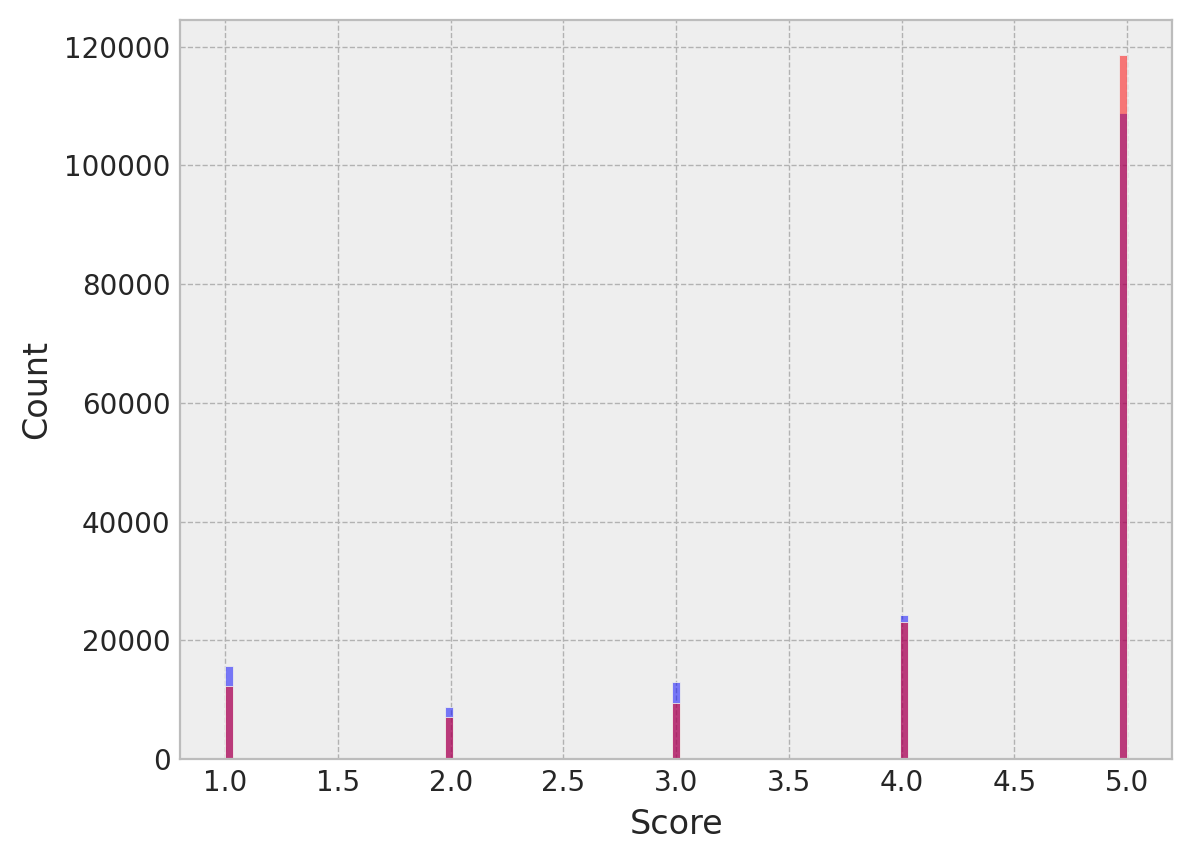

In [ ]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred3, color='red', alpha=0.5);

In [ ]:
KN_ac = accuracy_score(y_test, y_test_pred3)

## Random Forest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier()
classifier3.fit(X_train_bow, y_train)

RandomForestClassifier()

In [ ]:
y_test_pred2 = classifier3.predict(X_test_bow) # Prediction

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred2)) # Evaluating the model using the Evaluation metrics

print(classification_report(y_test, y_test_pred2))

0.7895588640588259
              precision    recall  f1-score   support

           1       0.91      0.55      0.68     15773
           2       0.97      0.37      0.54      8738
           3       0.97      0.38      0.55     12985
           4       0.96      0.39      0.55     24282
           5       0.76      1.00      0.86    108759

    accuracy                           0.79    170537
   macro avg       0.91      0.54      0.64    170537
weighted avg       0.83      0.79      0.76    170537



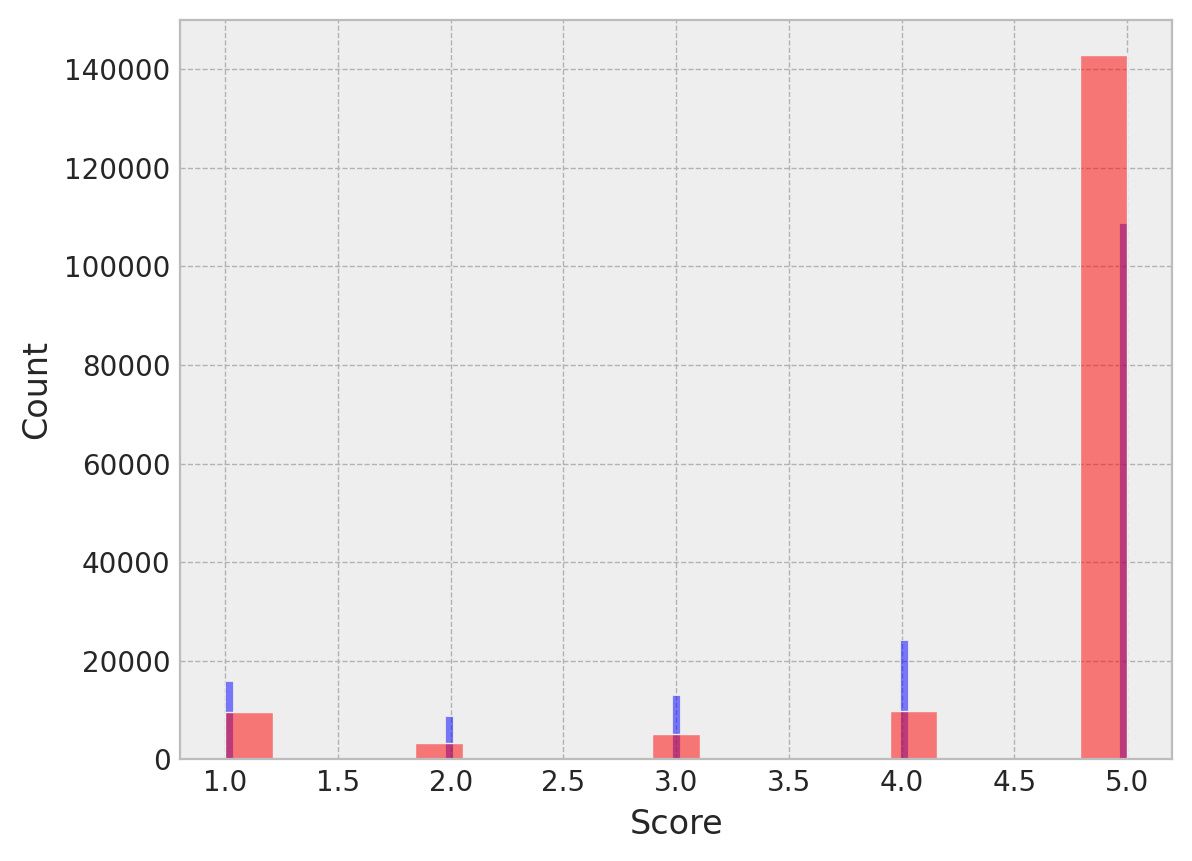

In [ ]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred2, color='red', alpha=0.5);

In [ ]:
RF_ac = accuracy_score(y_test, y_test_pred2)

## GradientBoostingClassifier Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clasifier5 = GradientBoostingClassifier()
clasifier5.fit(X_train_bow, y_train) # Training the model and Building the model

GradientBoostingClassifier()

In [ ]:
y_test_pred5= clasifier5.predict(X_test_bow) # Prediction

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred5)) # Evaluating the model using the Evaluation metrics

print(classification_report(y_test, y_test_pred5))

0.6786327893653576
              precision    recall  f1-score   support

           1       0.71      0.28      0.40     15773
           2       0.55      0.05      0.09      8738
           3       0.51      0.08      0.14     12985
           4       0.50      0.11      0.18     24282
           5       0.69      0.99      0.81    108759

    accuracy                           0.68    170537
   macro avg       0.59      0.30      0.32    170537
weighted avg       0.64      0.68      0.59    170537



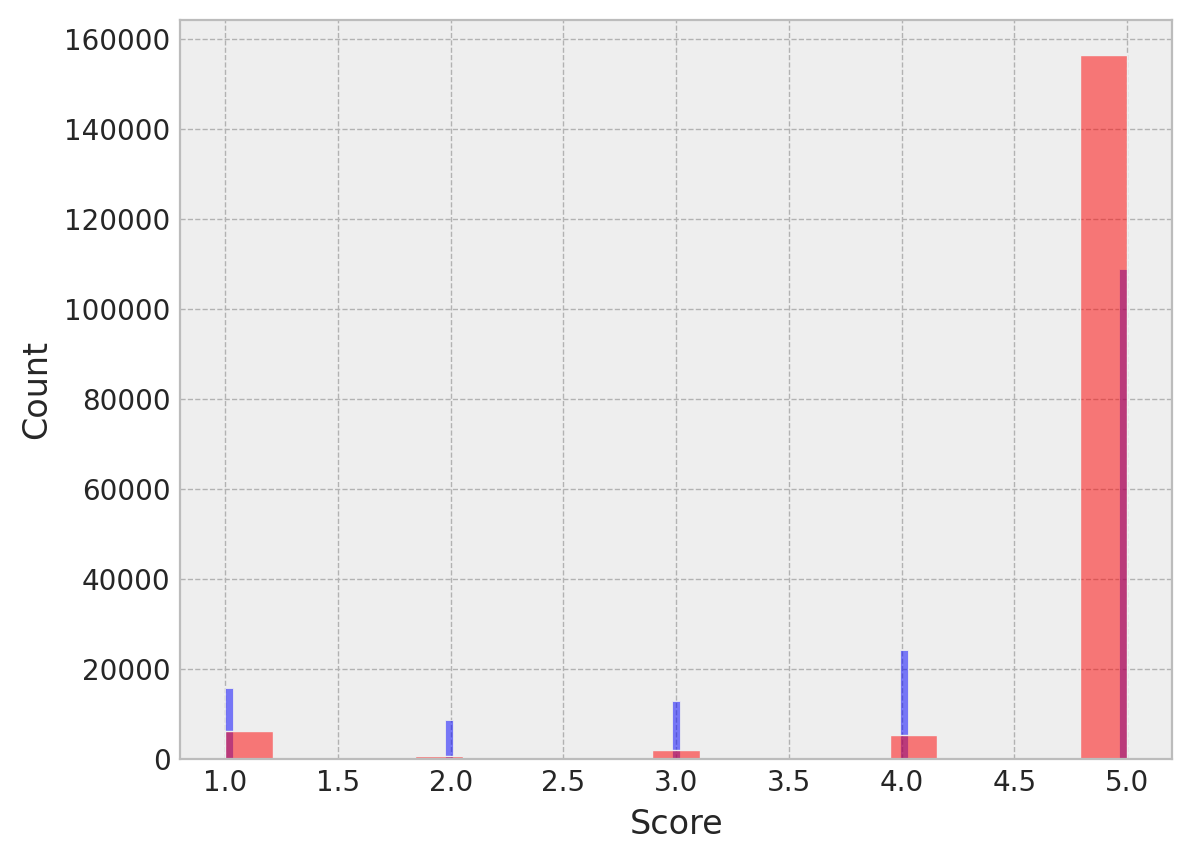

In [ ]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred5, color='red', alpha=0.5);

In [ ]:
GBDT_ac = accuracy_score(y_test, y_test_pred5)

In [ ]:
dict1 = {'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier'],
                       'accuracy_score':[LR_ac,KN_ac,DT_ac,RF_ac,GBDT_ac]}

In [ ]:
df = pd.DataFrame(dict1)
df

,Model,accuracy_score
0,LogisticRegression,0.727045
1,KNeighborsClassifier,0.662191
2,DecisionTreeClassifier,0.743059
3,RandomForestClassifier,0.789559
4,GradientBoostingClassifier,0.678633


# Conclusions:
- As we can conclude that, The Model Generated by `RandomForestClassifier` Algorithem is the best `Model` for the given `Text Data - Sentiment Analysis project` compared to all other models.
- The Evaluation matric - accuracy_score of `RandomForestClassifier` is high i.e., **`0.789559`**, Thus it is clear that RandomForestClassifier has the best performance of all models.
- The Outliers are not removed, they are re-scaled ,the models had been generated and evaluation is done.

- The model we generated is light for deployment and has medium level latency.